In [198]:
from pyforest import *

In [199]:
df  = pd.read_csv('data/total load station cleaned.csv')

In [200]:
df.head()

,Unnamed: 0,Hour,Day,Month,Load,Pressure,Relative Humidity,Temperature,BF12,BF7,F8B
0,0,1,1,1,39.7,981.25,42.90,24.485,0.23,3.6,0.97
1,1,2,1,1,38.8,981.05,45.25,24.120,0.24,3.6,0.93
2,2,3,1,1,38.1,980.70,50.90,22.620,0.23,3.5,0.90
3,3,4,1,1,37.7,980.60,55.30,21.435,0.22,3.3,0.85
4,4,5,1,1,38.9,980.95,60.15,20.510,0.22,3.3,0.83


In [201]:
df.shape

(8760, 11)

In [202]:
# may_data = df[df['Month'] == 5].drop('Temperature', axis=1)
# df.dropna(axis=0, inplace=True, subset=['Temperature'])

In [203]:
df.shape

(8760, 11)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
Unnamed: 0           8760 non-null int64
Hour                 8760 non-null int64
Day                  8760 non-null int64
Month                8760 non-null int64
Load                 8759 non-null object
Pressure             7765 non-null float64
Relative Humidity    7765 non-null float64
Temperature          4280 non-null float64
BF12                 5726 non-null float64
BF7                  5690 non-null float64
F8B                  5676 non-null float64
dtypes: float64(6), int64(4), object(1)
memory usage: 752.9+ KB


In [205]:
df['BF12'] = df['BF12'].astype(float)

In [206]:
df['BF7'] = df['BF7'].astype(float)

In [207]:
df['F8B'] = df['F8B'].astype(float)

In [208]:
df['F8B'] = df['F8B'].astype(float)

In [209]:
df['power'] = df['BF12'] + df['BF7'] + df['F8B']

In [210]:
df.head()

,Unnamed: 0,Hour,Day,Month,Load,Pressure,Relative Humidity,Temperature,BF12,BF7,F8B,power
0,0,1,1,1,39.7,981.25,42.90,24.485,0.23,3.6,0.97,4.80
1,1,2,1,1,38.8,981.05,45.25,24.120,0.24,3.6,0.93,4.77
2,2,3,1,1,38.1,980.70,50.90,22.620,0.23,3.5,0.90,4.63
3,3,4,1,1,37.7,980.60,55.30,21.435,0.22,3.3,0.85,4.37
4,4,5,1,1,38.9,980.95,60.15,20.510,0.22,3.3,0.83,4.35


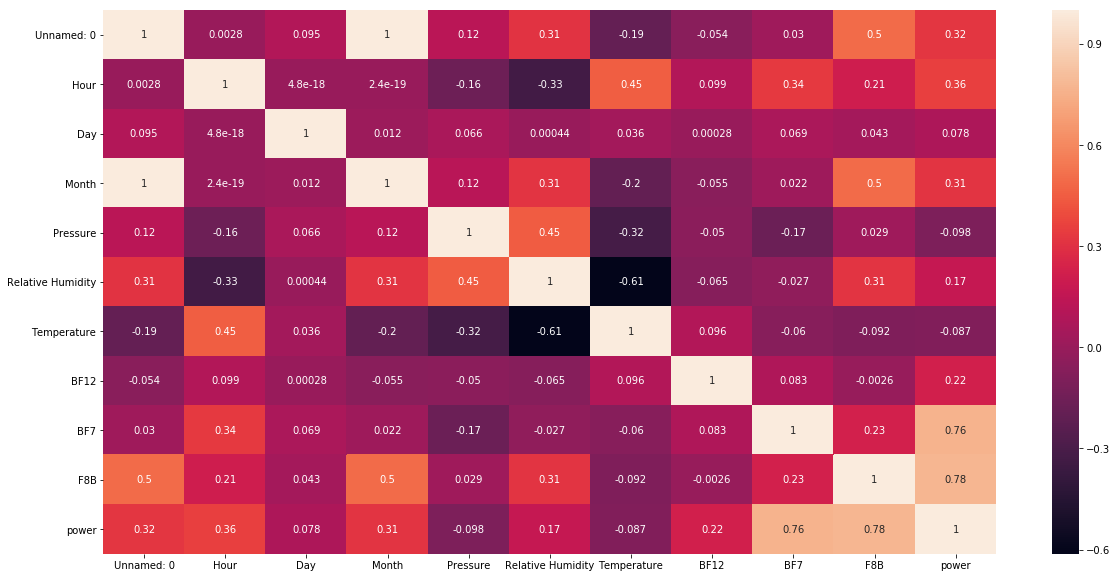

In [211]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [212]:
df.shape

(8760, 12)

In [213]:
from sklearn.model_selection import train_test_split

In [323]:
# df.dropna(axis=0, inplace=True)
new_data = df[['Day', 'Hour', 'Month', 'Pressure', 'Relative Humidity', 'Temperature', 'power']]

In [324]:
# features = df.drop(['BF12','F8B', 'BF7','Load', 'power','Unnamed: 0', 'Pressure'], axis=1)
new_data.shape

(8760, 7)

In [325]:
new_data.dropna(axis=0, inplace=True)

/home/ghaff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [326]:
new_data.shape

(1959, 7)

In [327]:
features = new_data[['Day','Hour', 'Month','Relative Humidity', 'Temperature']]

In [328]:
label = new_data[['power']]

In [329]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1959 entries, 0 to 8015
Data columns (total 7 columns):
Day                  1959 non-null int64
Hour                 1959 non-null int64
Month                1959 non-null int64
Pressure             1959 non-null float64
Relative Humidity    1959 non-null float64
Temperature          1959 non-null float64
power                1959 non-null float64
dtypes: float64(4), int64(3)
memory usage: 122.4 KB


In [513]:
features_train, features_test, labels_train, labels_test = train_test_split(features, label, test_size=0.16, random_state=1)

In [497]:
# from sklearn.preprocessing import MinMaxScaler

In [498]:
# scaler = MinMaxScaler()
# features_train = scaler.fit_transform(features_train)

In [499]:
# features_test = scaler.fit_transform(features_test)

In [500]:
# labels_train = scaler.fit_transform(labels_train)
# labels_test = scaler.fit_transform(labels_test)

In [501]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost
from sklearn.tree import DecisionTreeRegressor

In [502]:
model = RandomForestRegressor(max_depth=None, n_estimators=300, random_state=1)

In [514]:
# model = RandomForestRegressor()
# model = GradientBoostingRegressor()
# model = AdaBoostRegressor(
#     DecisionTreeRegressor(max_depth=2), n_estimators=200, learning_rate=0.5
# )
xgb = xgboost.XGBRegressor(n_estimators=1000, max_depth=4)

In [515]:
model.fit(features_train, labels_train)

/home/ghaff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [516]:
# xgb_reg = xgboost.XGBRegressor(max_depth=1, n_estimators=2000,learning_rate=0.5)

In [517]:
xgb.fit(features_train, labels_train)

[18:18:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [518]:
from sklearn.metrics import accuracy_score, r2_score,mean_squared_error

In [520]:
np.sqrt(mean_squared_error(labels_test, model.predict(features_test)))

0.45093600693403335

In [487]:
features_test.tail()

,Day,Hour,Month,Relative Humidity,Temperature
2345,8,18,4,57.00,32.230
624,27,1,1,61.95,24.595
37,2,14,1,21.90,33.875
7572,12,13,11,75.60,30.500
7689,17,10,11,87.05,27.165


In [480]:
labels_test.tail()

,power
2345,4.94
624,5.48
37,4.72
7572,7.45
7689,5.76


In [453]:
test = {
    'Day' : 8,
    'Hour' : 18,
    'Month' : 4,
    'Relative Humidity' : 57.00,
    
    
    'Temperature' : 32.230
    
}
xgb.predict(pd.DataFrame(test, index=[0]))

array([5.0944223], dtype=float32)

In [444]:
label.max()

power    38.22
dtype: float64

In [253]:
labels_test.shape

(145, 1)

In [522]:
model.score(features_test, labels_test)

0.9286536657774038

In [413]:
from joblib import dump
dump(model, 'real-models-hourly/rf' + str(round(model.score(features_test, labels_test),4)) + '.joblib')

['real-models-hourly/rf0.9335.joblib']

In [447]:
# from joblib import dump
dump(xgb, 'real-models-hourly/xgb' + str(round(xgb.score(features_test, labels_test),4)) + '.joblib')

['real-models-hourly/xgb0.939.joblib']

In [523]:
new_data

,Day,Hour,Month,Pressure,Relative Humidity,Temperature,power
0,1,1,1,981.25,42.90,24.485,4.80
1,1,2,1,981.05,45.25,24.120,4.77
2,1,3,1,980.70,50.90,22.620,4.63
3,1,4,1,980.60,55.30,21.435,4.37
4,1,5,1,980.95,60.15,20.510,4.35
...,...,...,...,...,...,...,...
8011,30,20,11,978.15,75.70,26.670,10.06
8012,30,21,11,979.15,79.75,25.830,10.07
8013,30,22,11,979.75,80.50,25.600,9.57
8014,30,23,11,979.70,81.65,25.100,8.74


In [526]:
# Evaluation Charts
from joblib import load

In [527]:
best_model = load('real-models-hourly/xgb0.939.joblib')

[20:32:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [556]:
day_one = new_data[new_data['Day'] == 1]
january_one = day_one[day_one['Month'] == 1]

In [563]:
january_one_features = january_one.drop(['power', 'Pressure'], axis=1)

In [564]:
january_one_features.head()

,Day,Hour,Month,Relative Humidity,Temperature
0,1,1,1,42.90,24.485
1,1,2,1,45.25,24.120
2,1,3,1,50.90,22.620
3,1,4,1,55.30,21.435
4,1,5,1,60.15,20.510


In [565]:
january_one_labels = january_one[['power']]

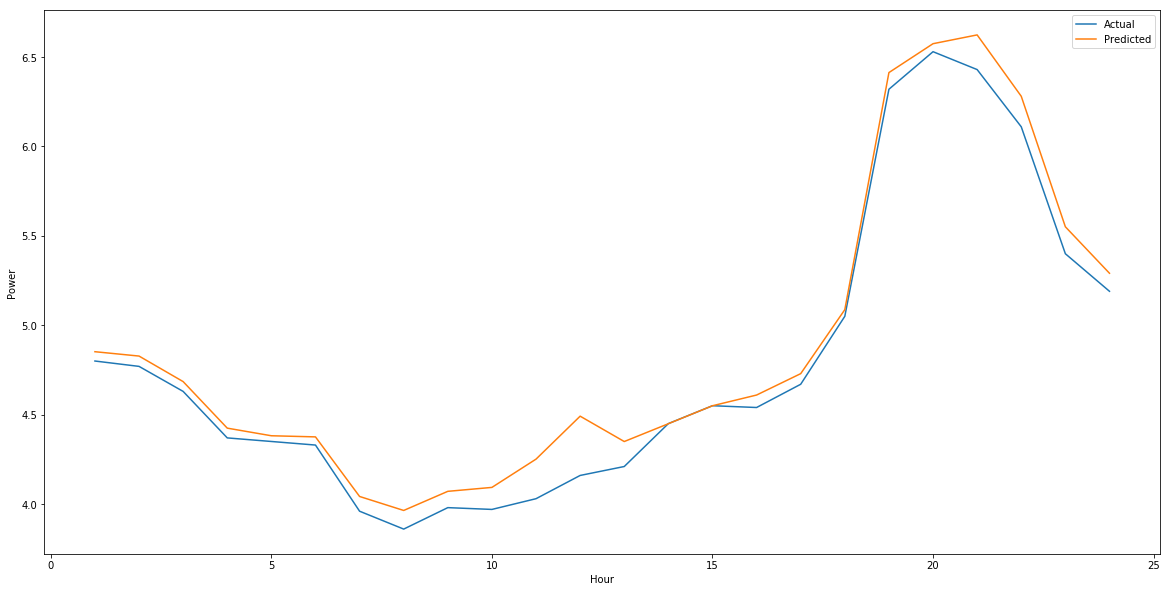

In [569]:
plt.figure(figsize=(20,10))
plt.plot(january_one_features['Hour'], january_one_labels)
plt.plot(january_one_features['Hour'], model.predict(january_one_features))
plt.xlabel('Hour')
plt.ylabel('Power')
plt.legend(['Actual', 'Predicted'])

In [570]:
# sectioning the errors

In [571]:
features_test

,Day,Hour,Month,Relative Humidity,Temperature
2464,13,17,4,69.50,29.615
7644,15,13,11,83.30,29.015
2500,15,5,4,93.55,21.720
2240,4,9,4,91.10,26.220
7735,19,8,11,98.45,23.760
...,...,...,...,...,...
465,20,10,1,73.60,27.520
2679,22,16,4,63.15,33.105
2174,1,15,4,53.80,36.135
264,12,1,1,68.30,25.815


In [573]:
first_eight_hours_features = features_test[features_test['Hour'] < 8]
first_eight_hours_features

,Day,Hour,Month,Relative Humidity,Temperature
2500,15,5,4,93.55,21.720
2808,28,1,4,89.95,26.070
2379,10,4,4,82.30,24.415
7921,27,2,11,90.70,24.605
2713,24,2,4,96.40,23.050
...,...,...,...,...,...
53,3,6,1,48.50,19.470
267,12,4,1,78.80,23.555
698,30,3,1,74.45,23.820
264,12,1,1,68.30,25.815


In [580]:
test_set = features_test
test_set['power'] = labels_test['power']

/home/ghaff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [581]:
# test_set.dropna(axis=0, inplace=True)
test_set

,Day,Hour,Month,Relative Humidity,Temperature,power
2464,13,17,4,69.50,29.615,5.50
7644,15,13,11,83.30,29.015,7.26
2500,15,5,4,93.55,21.720,5.64
2240,4,9,4,91.10,26.220,4.37
7735,19,8,11,98.45,23.760,5.49
...,...,...,...,...,...,...
465,20,10,1,73.60,27.520,4.06
2679,22,16,4,63.15,33.105,5.42
2174,1,15,4,53.80,36.135,5.44
264,12,1,1,68.30,25.815,5.59


In [582]:
first_eight_hours = test_set[test_set['Hour'] < 8]
first_eight_hours

,Day,Hour,Month,Relative Humidity,Temperature,power
2500,15,5,4,93.55,21.720,5.64
2808,28,1,4,89.95,26.070,8.03
2379,10,4,4,82.30,24.415,4.63
7921,27,2,11,90.70,24.605,5.32
2713,24,2,4,96.40,23.050,5.43
...,...,...,...,...,...,...
53,3,6,1,48.50,19.470,4.53
267,12,4,1,78.80,23.555,5.18
698,30,3,1,74.45,23.820,5.38
264,12,1,1,68.30,25.815,5.59


In [584]:
first_eight_hours_features = first_eight_hours.drop('power', axis=1)

In [586]:
first_eight_hours_labels = first_eight_hours[['power']]

In [603]:
acc1 = best_model.score(first_eight_hours_features,first_eight_hours_labels)

### 92.4% accuracy between 12am and 8am

In [589]:
# second eight hours


In [590]:
second_eight_hours = test_set[test_set['Hour'] < 16]
second_eight_hours = second_eight_hours[second_eight_hours['Hour'] >= 8]

In [592]:
second_eight_hours_features = second_eight_hours.drop('power', axis=1)

In [593]:
second_eight_hours_labels = second_eight_hours[['power']]

In [602]:
acc2 = best_model.score(second_eight_hours_features, second_eight_hours_labels)

### 95.6% accuracy between 8am and 4pm

In [596]:
third_eight_hours = test_set[test_set['Hour'] >= 16]

In [597]:
third_eight_hours_features = third_eight_hours.drop('power', axis=1)

In [598]:
third_eight_hours_labels = third_eight_hours[['power']]

In [608]:
acc3 = best_model.score(third_eight_hours_features, third_eight_hours_labels)
acc3

0.9582011055188385

<BarContainer object of 3 artists>

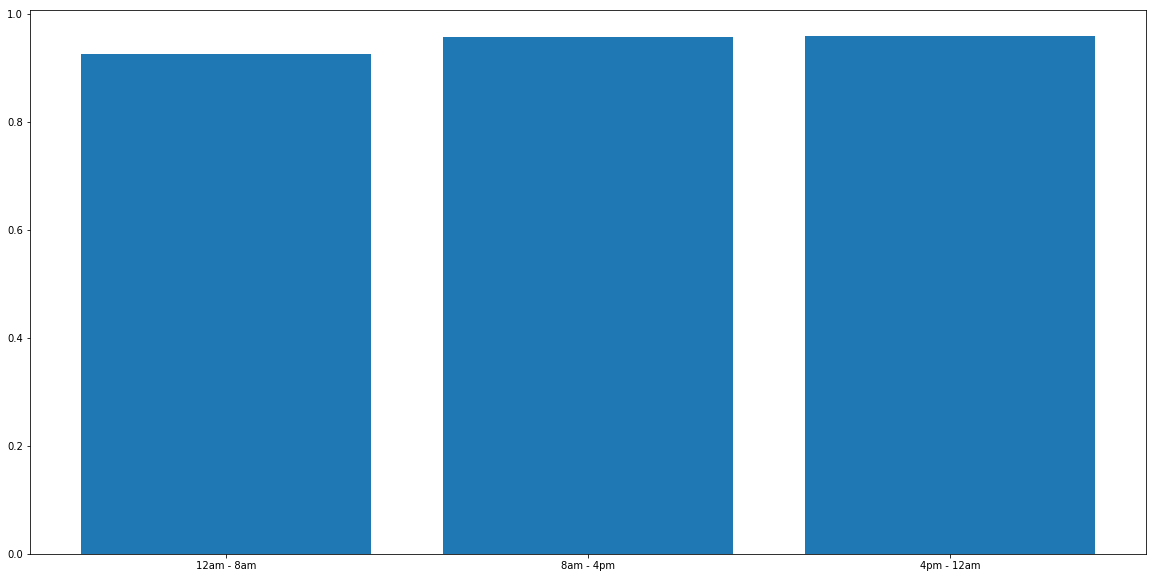

In [607]:
division_names = ['12am - 8am', '8am - 4pm', '4pm - 12am']
plt.figure(figsize=(20, 10))
plt.bar(division_names, [acc1, acc2, acc3])